<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/knn_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']
y = data['target']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Разделяем выборку на две части: обучающую(train) и проверочную(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
# обучаем алгоритм на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Делаем предсказание для объектов из тестовой выборки
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# проверяем качество алгоритма на тестовой выборке
accuracy_score(y_test, knn.predict(X_test))

0.98

In [ ]:
# 

### Задание 1.
Построить график K и accuracy, для train/test = 0.3

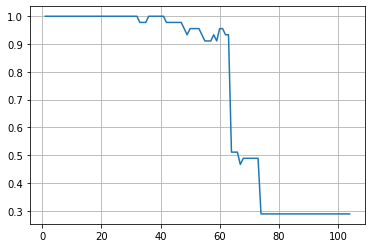

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
acc_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for k in range(1, 105):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  acc_scores.append(accuracy_score(y_test, knn.predict(X_test)))
plt.plot(range(1, 105), acc_scores)
plt.grid()
plt.show()

### Задание 2.

Постройте график K и cross_val_score для ВСЕЙ выборки

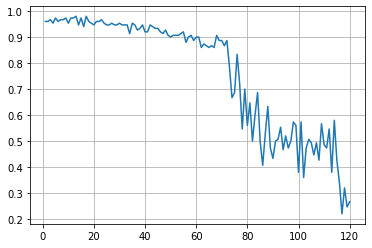

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

%matplotlib inline

import matplotlib.pyplot as plt
acc_scores = []

for k in range(1, 121):
  knn = KNeighborsClassifier(n_neighbors=k)
  acc_scores.append(cross_val_score(knn, X, y, cv = KFold(n_splits=5, shuffle=True)).mean())
plt.plot(range(1, 121), acc_scores)
plt.grid()
plt.show()

### Задание 3.
* Разбейте выборку на train/test 0.8/0.2
* Найдите наилучшее K с помощью крос-валидации на **train**
* Проверьте, какое качество будет на test с данной моделью. 


In [ ]:
#тк train/test 0.8/0.2, а всего объектов 150, то train=120 test=30
acc_scores = []
m=0
l=0
# разбиваем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for k in range(1, 97):
  knn = KNeighborsClassifier(n_neighbors=k)
  # кросс-валидация на train
  acc_scores.append(cross_val_score(knn, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)).mean())
  if acc_scores[k-1]>m:
    m=acc_scores[k-1]
    l=k
print(l,m) #найденное k и accuracy при этом k
# проверка на test
knn = KNeighborsClassifier(n_neighbors=l)
print(cross_val_score(knn, X_test, y_test, cv = KFold(n_splits=5, shuffle=True)).mean())

10 0.975
0.9333333333333333


### Задание 4.
Используя cross_val_score для всей выборки, найдите лучший параметр k.



In [ ]:
acc_scores = []
m=0
l=0
for k in range(1, 121):
  knn = KNeighborsClassifier(n_neighbors=k)
  acc_scores.append(cross_val_score(knn, X, y, cv = KFold(n_splits=5, shuffle=True)).mean())
  if acc_scores[k-1]>m:
    m=acc_scores[k-1]
    l=k
print(l)

11


## Задание 5 (доп)

Попробуйте получить наилучшее качество кросс-валидации, изменяя параметры:
* k
* p
* weights

In [ ]:
#изменение k
acc_scores = []
m=0
l=0
for k in range(1, 120):
  knn = KNeighborsClassifier(n_neighbors=k)
  acc_scores.append(cross_val_score(knn, X, y, cv = KFold(n_splits=5, shuffle=True)).mean())
  if acc_scores[k-1]>m:
    m=acc_scores[k-1]
    l=k
print(m,l)

0.9733333333333334 12
